<a href="https://colab.research.google.com/github/rafsanalhad/PCVK_17_Harafsan_Alhad/blob/main/Week3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

change brightness
--------------------------------
input value brightness: 70


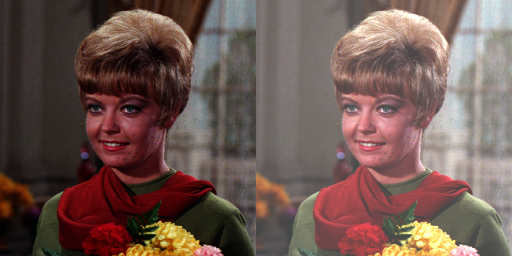

In [6]:
print('change brightness')
print('--------------------------------')
try:
  brightness = int(input('input value brightness: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/content/drive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


# Task

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

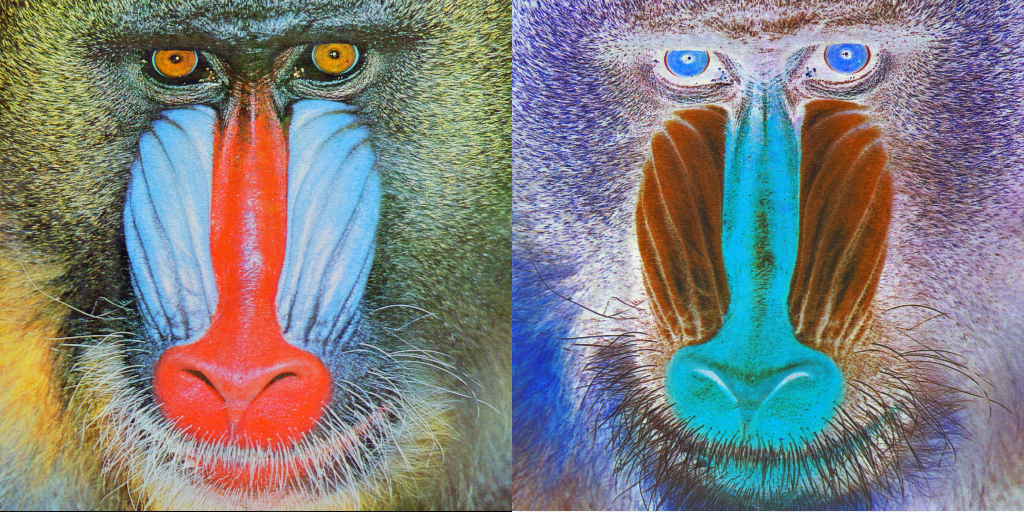

In [7]:
original_monkey = cv.imread('/content/drive/MyDrive/content/drive/mandrill.tiff')
negative_image = np.zeros(original_monkey.shape, original_monkey.dtype)

for y in range(negative_image.shape[0]):
  for x in range(negative_image.shape[1]):
    for c in range(negative_image.shape[2]):
      negative_image[y, x, c] = 255 - original_monkey[y, x, c]

original_monkey_frame = cv.hconcat((original_monkey, negative_image))
cv2_imshow(original_monkey_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Input contrast and brightness level 
--------------------------------------------
Input contrast level [-255,-255]: 70
Input contrast [1.0 - 3.0]: 2


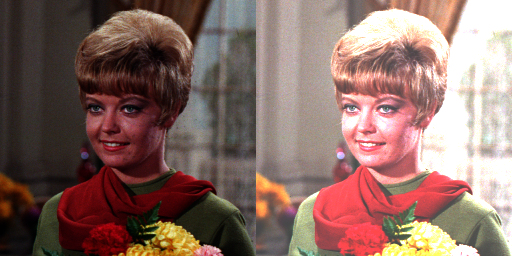

In [8]:
print('Input contrast and brightness level ')
print('--------------------------------------------')

try:
  brightness2 = float(input('Input contrast level [-255,-255]: '))
  contrast = float(input('Input contrast [1.0 - 3.0]: '))
except ValueError:
  print("Error, value not number")

contrast_image = np.zeros(original.shape, original.dtype)

for y in range(contrast_image.shape[0]):
  for x in range(contrast_image.shape[1]):
    for c in range(contrast_image.shape[2]):
      # formula -> g(x, y) = a * f(x,y) + b
      contrast_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness2, 0, 255)

contrast_frame = cv.hconcat((original, contrast_image))
cv2_imshow(contrast_frame)



3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


Change img contrast with log transformation
-------------------------------------------------------
Input brightness level: 50


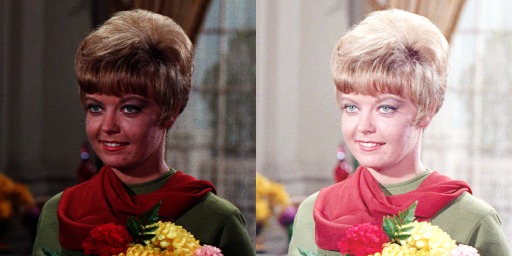

In [9]:

print('Change img contrast with log transformation')
print('-------------------------------------------------------')

try:
  brightness3 = float(input('Input brightness level: '))
except ValueError:
  print('Error, value not number')

original_log = original.astype(np.float32)

logaritmic_image = brightness3 * np.log(1 + original_log)


logaritmic_image = np.clip(logaritmic_image, 0, 255)
logaritmic_image = logaritmic_image.astype(np.uint8)

log_image_frame = cv.hconcat((original, logaritmic_image))
cv2_imshow(log_image_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

In [10]:
original_monkey_rgb = original_monkey.copy()

averaging

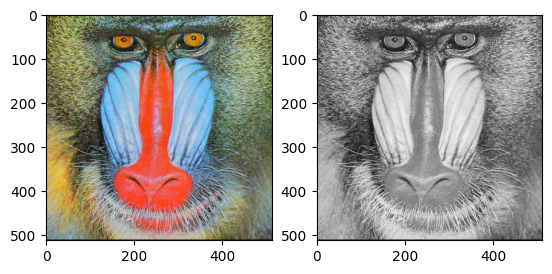

In [12]:
original_monkey_rgb = cv.cvtColor(original_monkey, cv.COLOR_BGR2RGB)

grayscale_averaging = np.zeros((original_monkey.shape[0], original_monkey.shape[1]), dtype=np.uint8)
for y in range(original_monkey.shape[0]):
  for x in range(original_monkey.shape[1]):
    grayscale_averaging[y, x] = int(np.mean(original_monkey[y,x]))

fig, axes = plt.subplots(1, 2)

axes[0].imshow(original_monkey_rgb)

axes[1].imshow(grayscale_averaging, cmap='gray')

lightness

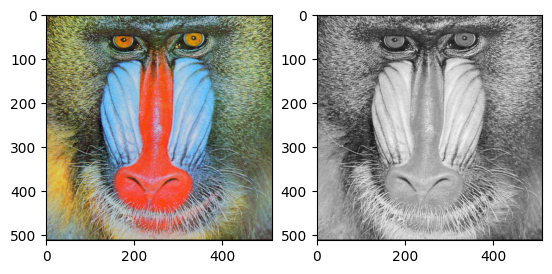

In [13]:

grayscale_lightness = np.zeros((original_monkey.shape[0], original_monkey.shape[1]), dtype=np.uint8)
for y in range(original_monkey.shape[0]):
  for x in range(original_monkey.shape[1]):
        max_val = int(np.max(original_monkey[y, x]))
        min_val = int(np.min(original_monkey[y, x]))
        grayscale_lightness[y, x] = (max_val + min_val) // 2

fig, axes = plt.subplots(1, 2)

axes[0].imshow(original_monkey_rgb)
axes[1].imshow(grayscale_lightness, cmap='gray')


luminance

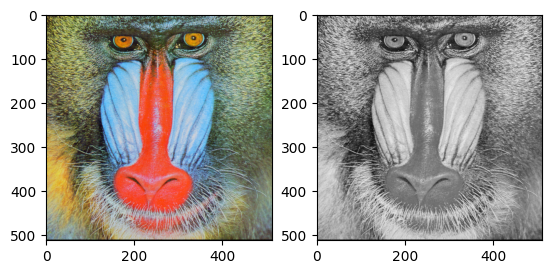

In [14]:

grayscale_luminance = np.zeros((original_monkey.shape[0], original_monkey.shape[1]), dtype=np.uint8)
for y in range(original_monkey.shape[0]):
  for x in range(original_monkey.shape[1]):
      r, g, b = original_monkey[y, x][2], original_monkey[y, x][1], original_monkey[y, x][0]
      grayscale_luminance[y, x] = int(0.21 * r + 0.72 * g + 0.07 * b)

fig, axes = plt.subplots(1,2)

axes[0].imshow(original_monkey_rgb)
axes[1].imshow(grayscale_luminance, cmap='gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

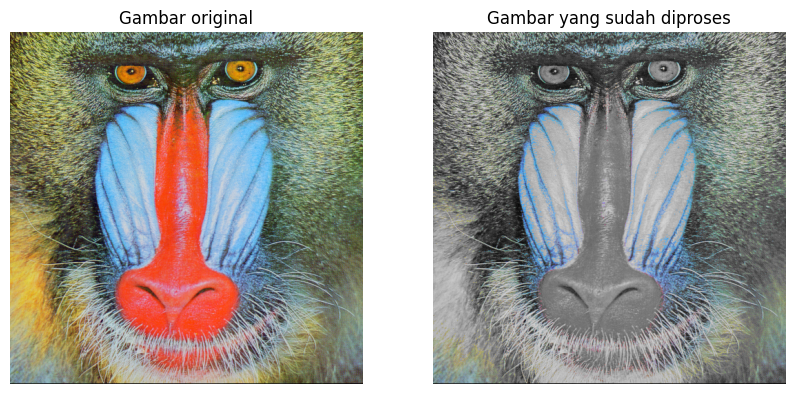

In [15]:
monkey_img = original_monkey.copy()
monkey_img = cv.cvtColor(original_monkey, cv.COLOR_BGR2RGB)

lower_blue = np.array([0, 0, 100])
upper_blue = np.array([180, 180, 255])

mask = cv.inRange(monkey_img, lower_blue, upper_blue)

gray_image = cv.cvtColor(monkey_img, cv.COLOR_RGB2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2RGB)

result = np.where(mask[:, :, None].astype(bool), monkey_img, gray_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Gambar original')
plt.imshow(monkey_img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gambar yang sudah diproses')
plt.imshow(result)
plt.axis('off')

plt.show()
